<a href="https://colab.research.google.com/github/MadhumitaGaneshbabu/dynamic_price_prediction/blob/main/Copy_of_lstm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/200
75/75 [==============================] - 19s 141ms/step - loss: 5924616.0000 - val_loss: 5241309.0000
Epoch 2/200
75/75 [==============================] - 8s 104ms/step - loss: 3131308.2500 - val_loss: 1123776.3750
Epoch 3/200
75/75 [==============================] - 9s 115ms/step - loss: 510616.3750 - val_loss: 79217.1328
Epoch 4/200
75/75 [==============================] - 10s 132ms/step - loss: 54650.3008 - val_loss: 24478.9648
Epoch 5/200
75/75 [==============================] - 8s 112ms/step - loss: 19955.6992 - val_loss: 14108.0977
Epoch 6/200
75/75 [==============================] - 10s 133ms/step - loss: 16767.0215 - val_loss: 9310.2715
Epoch 7/200
75/75 [==============================] - 9s 122ms/step - loss: 10027.5078 - val_loss: 9359.3486
Epoch 8/200
75/75 [==============================] - 9s 114ms/step - loss: 9882.1104 - val_loss: 7769.9629
Epoch 9/200
75/75 [==============================] - 9s 126ms/step - loss: 7570.5273 - val_loss: 5387.1152
Epoch 10/200


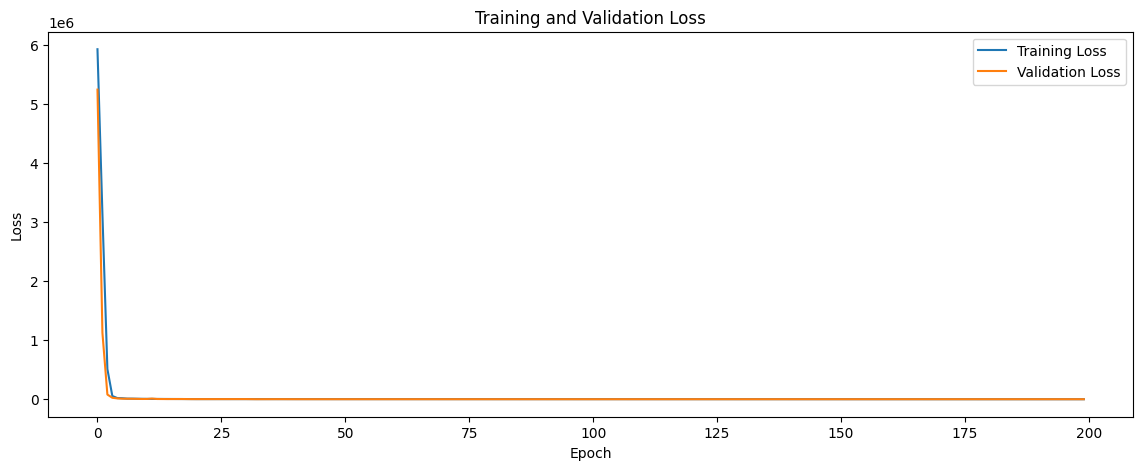

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split


data = pd.read_csv('oil.csv')

data['price'].fillna(method='ffill', inplace=True)
data['commission'].fillna(method='ffill', inplace=True)
data['payment_terms'].fillna(method='ffill', inplace=True)
data['payment_method'].fillna(method='ffill', inplace=True)

data['commission'] = data['commission'].str.rstrip('%').astype('float') / 100.0
data['payment_terms'] = data['payment_terms'].str.rstrip('%').astype('float') / 100.0

data['order_date'] = pd.to_datetime(data['order_date'].str.strip("'"), dayfirst=True)

features = data[['price', 'commission', 'payment_terms']]
sales_price = data['final_price']

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

timesteps = 1
features_standardized = features_standardized.reshape((features_standardized.shape[0], timesteps, features_standardized.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(features_standardized, sales_price, test_size=0.2, shuffle=True)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=True)

numFeatures = X_train.shape[2]
numHiddenUnits = 500

model = Sequential([
    LSTM(1024, return_sequences=True, input_shape=(timesteps, numFeatures)),
    LSTM(256, return_sequences=True),
    LSTM(63, return_sequences=True),
    LSTM(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=250,
    decay_rate=0.9
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='mean_squared_error')


history = model.fit(X_train, y_train, epochs=200, batch_size=8, verbose=1, validation_data=(X_val, y_val))


plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 2s 22ms/step


<ipython-input-4-382e38cc4998>:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x_pred, YPred.flatten() - y_test.values, use_line_collection=True)


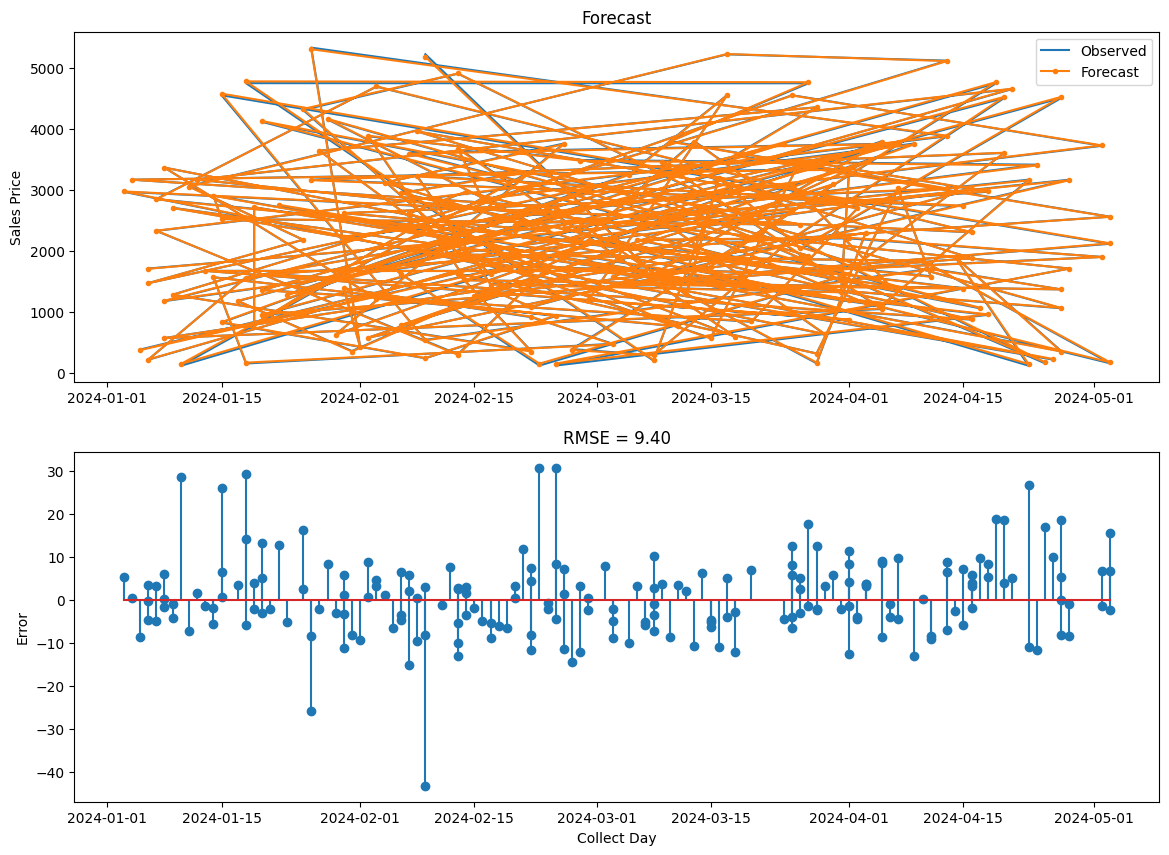

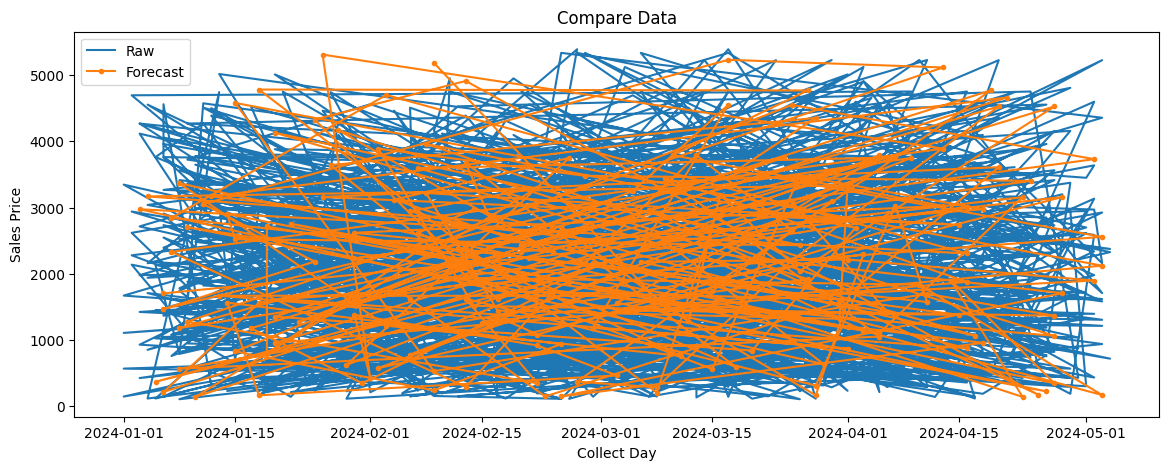

In [ ]:
model.save('my_model_v3.h5')

YPred = model.predict(X_test)


rmse = np.sqrt(np.mean((YPred.flatten() - y_test.values)**2))


x_data = data['order_date']
x_train = x_data.iloc[:len(X_train)]
x_pred = x_data.iloc[len(X_train):len(X_train) + len(X_test)]


plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.plot(x_pred, y_test.values, label='Observed')
plt.plot(x_pred, YPred, '.-', label='Forecast')
plt.legend()
plt.ylabel("Sales Price")
plt.title("Forecast")

plt.subplot(2, 1, 2)
plt.stem(x_pred, YPred.flatten() - y_test.values, use_line_collection=True)
plt.xlabel("Collect Day")
plt.ylabel("Error")
plt.title(f"RMSE = {rmse:.2f}")
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(x_data, sales_price, label='Raw')
plt.plot(x_pred, YPred, '.-', label='Forecast')
plt.xlabel("Collect Day")
plt.ylabel("Sales Price")
plt.title("Compare Data")
plt.legend()
plt.show()

In [ ]:
print(YPred)

[[1705.457  ]
 [2246.1497 ]
 [3159.6187 ]
 [1576.7316 ]
 [ 167.69539]
 [2298.284  ]
 [ 568.414  ]
 [1053.9624 ]
 [3453.2146 ]
 [1879.138  ]
 [ 955.48096]
 [4526.5933 ]
 [2043.5818 ]
 [3190.1504 ]
 [1284.6023 ]
 [2711.5703 ]
 [3168.405  ]
 [3333.8777 ]
 [1320.8794 ]
 [1446.2043 ]
 [3220.4277 ]
 [2739.5461 ]
 [3159.6187 ]
 [3610.448  ]
 [1777.6589 ]
 [3960.3933 ]
 [2696.0073 ]
 [ 842.9446 ]
 [1354.8894 ]
 [4768.743  ]
 [ 373.55188]
 [ 287.07013]
 [2203.3564 ]
 [4526.5933 ]
 [1179.5133 ]
 [ 348.28702]
 [1882.299  ]
 [2904.3342 ]
 [2522.7676 ]
 [2432.4612 ]
 [4129.2393 ]
 [1068.0579 ]
 [2181.263  ]
 [2216.3716 ]
 [1899.2937 ]
 [1656.7023 ]
 [2972.9617 ]
 [2619.3674 ]
 [ 763.3916 ]
 [1218.2051 ]
 [3366.1355 ]
 [1192.1545 ]
 [2756.886  ]
 [ 348.28702]
 [1898.1747 ]
 [ 143.06265]
 [2383.1162 ]
 [3157.1455 ]
 [1106.1709 ]
 [2703.413  ]
 [ 226.01926]
 [1565.5177 ]
 [3453.2144 ]
 [ 142.56369]
 [3300.4153 ]
 [2944.2458 ]
 [ 877.00104]
 [1617.8838 ]
 [2558.5576 ]
 [3557.3972 ]
 [4353.62   ]
 [3641

In [ ]:
print(y_test)

173    1710.0
40     2234.4
366    3168.0
583    1584.0
222     155.2
        ...  
899    3762.0
868     627.0
742    3800.0
730    1620.0
118    5227.2
Name: final_price, Length: 200, dtype: float64
